# Dragon Raja: Examining Dragon Raja Treasure of Times Drop Rate (Part 1) 

<img src="https://encdn.ldmnq.com/ldstore/id/RwFZiN-1603965019896.jpg" width="800">


Dragon Raja is an MMORPG game developed by Archosaur Games. The game is well-known for its high quality graphic and its intense storyline. It also provide various classes for players to choose and various game modes. Apart from normal PvE and PvP gamemode, it also provides career, mini games and social relation functions. Despite these features, Dragon Raja also provide different fashion items for players to customize their own styles for their character and this feature earns Archosaur lots of income. 

Fashions used to be hard for players to obtain until developers introduced "Treasure of Time" package. Treasure of Time or 'ToT' is a lottery-liked items that reruns fashions from past events. The price for this item is lower and more accesible for a lot of players compared to outfit in other features.

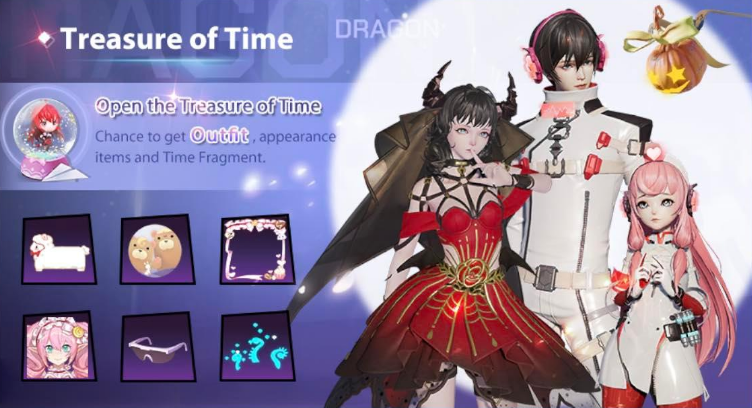

Treasure of Time resets every month. Each set of ToT introduced 2 sets of fashion from past events randomly. Each ToT box will have chance to give basic items, accessories. The biggest prize for this lottery is hair and outfit from 2 sets of the fashions. However, apart from discounted packages and 300 extra chance, players can only buy up to 99 boxes per day.

## Objective for Experiment
As I see myself, friends, clubmates and other players opened a lot of these lottery boxes. I came up with a lot of questions regards to the drop rates. Despite the fact, <b>the developers and the game do not reveal the actual rate to players.</b> But most of players says it tend to be around 1%, meaning you will likely to get 1 fashion item per 100 draws. To prove this, it's better to examine the rate and dive deep into it.

<b> I have 3 main questions to answer: </b>
1) What's the mean and distribution for overall fashions drop rate?

2) Does hair really have higher drop rate compared to outfit?

3) Do both set of fashions have identical drop rates?


## Data Preperation and EDA

In [1]:
# import base modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this examination, I will use the data collected from Dragon Raja players who open Treasure of Times during the time it introduces "Pisces" and "Bluebird Nesting" fashion sets. Each row of data represents results in 100 draws while each column represent drops of each fashion item; outfit and hair for each fashion set. I choose 100 as numbers of draws per each simulation as it is maximum amount player can buy per day. This amount also large enough to see the trend of item drops.

I think everyone wonders what is the hair and outfit for each outfit set looks like?  Here's a picture of it!  The fashion set on the left side is "Pisces" while the right one is "Bluebird Nesting". Both of them really look good.

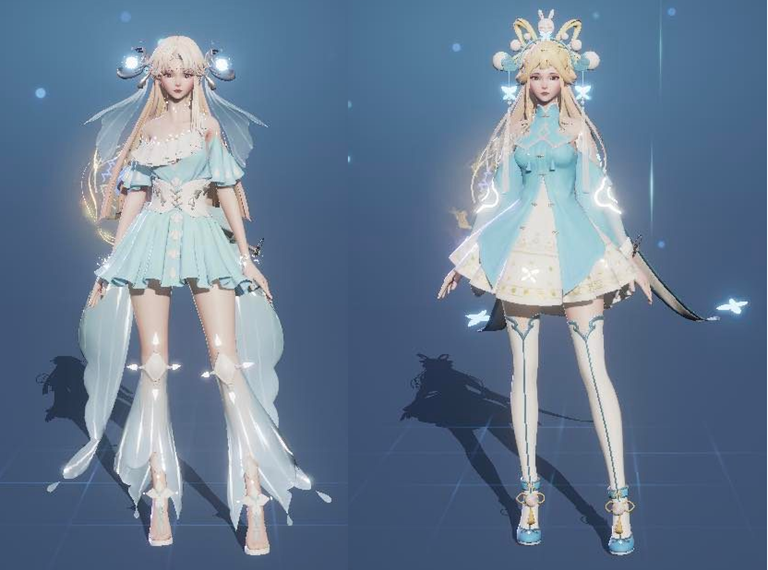

In [2]:
df = pd.read_csv('tot_bb.csv')
df.head()

,pisces_o,pisces_h,bb_o,bb_h
0,0,0,1,1
1,0,0,1,0
2,0,1,0,1
3,0,0,0,0
4,0,0,0,0


In [3]:
df.describe()

,pisces_o,pisces_h,bb_o,bb_h
count,35.000000,35.000000,35.00000,35.000000
mean,0.114286,0.342857,0.20000,0.428571
std,0.322803,0.481594,0.40584,0.557606
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.00000,0.000000
75%,0.000000,1.000000,0.00000,1.000000
max,1.000000,1.000000,1.00000,2.000000


In [4]:
df['outfit'] = df.pisces_o + df.bb_o
df['hair'] = df.pisces_h + df.bb_h
df['total'] = df.outfit + df.hair
df.head()

,pisces_o,pisces_h,bb_o,bb_h,outfit,hair,total
0,0,0,1,1,1,1,2
1,0,0,1,0,1,0,1
2,0,1,0,1,0,2,2
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


Text(0.5, 0, '')

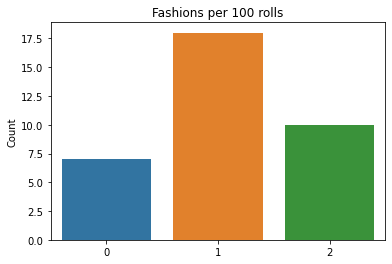

In [5]:
sns.countplot(data=df,x='total')
plt.title('Fashions per 100 rolls')
plt.ylabel('Count')
plt.xlabel('')

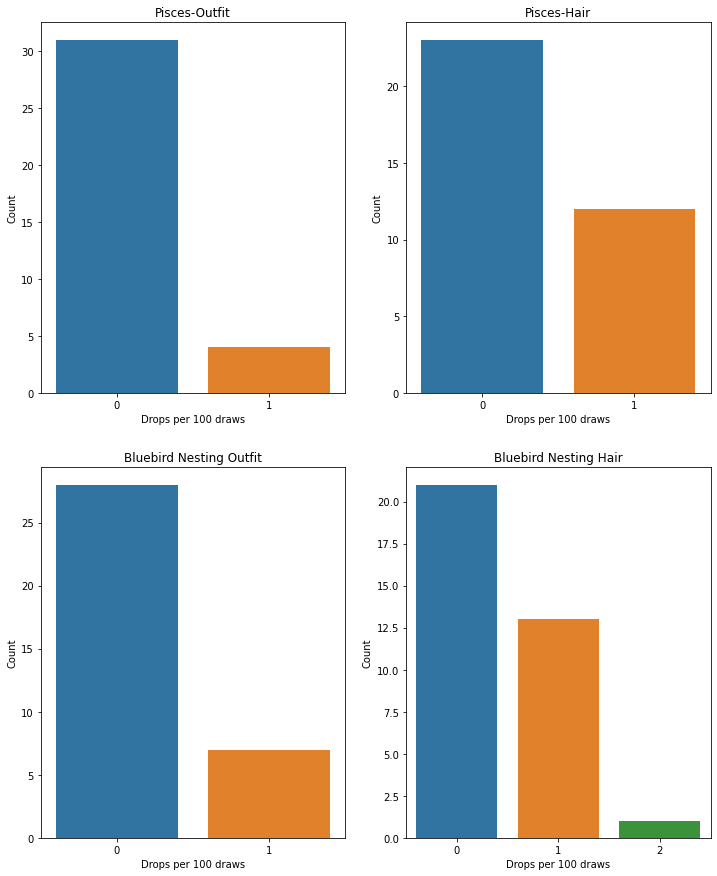

In [6]:
fig,ax = plt.subplots(2,2,figsize=(12,15))
titles = ['Pisces-Outfit','Pisces-Hair','Bluebird Nesting Outfit','Bluebird Nesting Hair']

for i,ax,t in zip(df.columns[0:4],ax.flatten(),titles):
    sns.countplot(data=df,x=i,ax=ax)
    ax.set_xlabel("Drops per 100 draws")
    ax.set_ylabel('Count')
    ax.set_title(t)

We can see a proportion of success and failure to draw each item in each simulation. The difference between each item is noticable but further experiment will give us better understanding.

## Answering questions...

Despite that, we only have 35 actual simulations. We would need more entry to do A/B testing to compare results and answer these questions. Bootstrapping the data would be a great choice to proceed.

In [7]:
total_mean = np.empty(500)

for i in range(0,500):
    df_temp = df.sample(n=500,replace=True,random_state=i)
    total_mean[i] = df_temp['total'].mean()    

<AxesSubplot:ylabel='Count'>

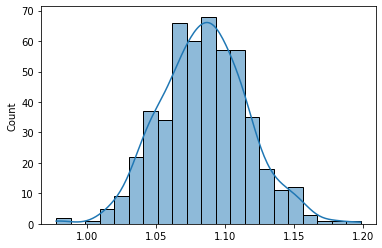

In [8]:
sns.histplot(x=total_mean,kde=True)

In [9]:
cf1 , cf2 = np.percentile(total_mean,[2.5,97.5])

print('Mean Drop Rate: {:.2f}%'.format(np.mean(total_mean)))
print('Mean 95% Confidence Interval: [{:.2f},{:.2f}]'.format(cf1,cf2))


Mean Drop Rate: 1.08%
Mean 95% Confidence Interval: [1.03,1.15]


### Does hair really have higher drop rate compared to outfit?
In Dragon Raja, outfit gives more rating and beauty score than hair from the same set gives. I also see a lot of players draw hairs more frequent and see more hairs selling in mall war. So this forms my hypothesis that hairs drop rate might be higher than outfits'. It's better to examine this.

To answer this question, I will use the same bootstrap samples but specify to get mean value of outfit and hairs. This will help prevent the sampling bias causing from different bootstrap sets. Then A/B testing will be used to give statistical results.

In [10]:
# Bootstrapping
hair_mean = np.empty(500)
outfit_mean = np.empty(500)

for i in range(0,500):
    df_temp = df.sample(n=500,replace=True,random_state=i)
    hair_mean[i] = df_temp['hair'].mean()
    outfit_mean[i] = df_temp['outfit'].mean()       

Text(0.5, 1.0, 'Hairs per 100 draws')

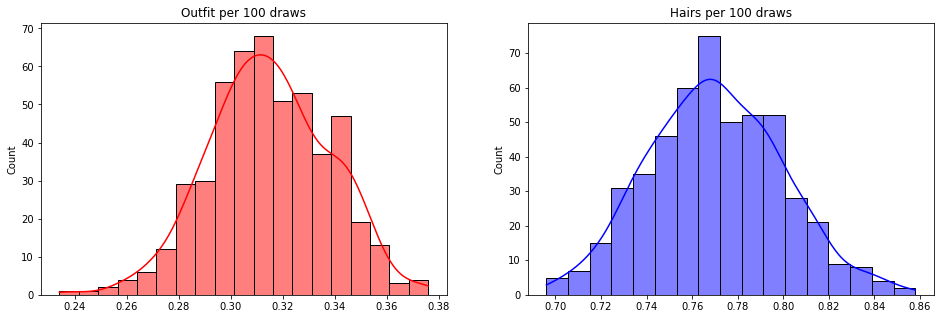

In [11]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

sns.histplot(outfit_mean,kde=True,color='r',ax=ax[0])
ax[0].set_title('Outfit per 100 draws')

sns.histplot(hair_mean,kde=True,color='b',ax=ax[1])
ax[1].set_title('Hairs per 100 draws')

In [12]:
# Fashions drop rate
print('Mean Hair Drop Rate: {:.2f}%'.format(np.mean(hair_mean)))
print('Mean Outfit Drop Rate: {:.2f}%'.format(np.mean(outfit_mean)))                                              

Mean Hair Drop Rate: 0.77%
Mean Outfit Drop Rate: 0.31%


In [13]:
# Test null hypothesis of hair drop rate higher than outfit drop rate
p_value = np.sum(hair_mean > outfit_mean) / len(total_mean)
print('p-value: {}'.format(p_value))

p-value: 1.0


Both histogram and results from A/B Testing yield the same result. Players tend to draw hairs more frequent compared to outfit. The results also shows that hair drop rate is more than double of outfit drop rate. So you will need more pulls if you want to get some outfits...

### Do both sets of fashions have identical drop rate?
To answer this question, I will use the same approach as previous question, but with different variables. This time I will use the sum of hair and outfit of each set of fashions.

In [14]:
# Bootstrapping
pisces_mean = np.empty(500)
bluebird_mean = np.empty(500)

for i in range(0,500):
    df_temp = df.sample(n=500,replace=True,random_state=i)
    df_temp['pisces'] = df_temp['pisces_o'] + df_temp['pisces_h']
    df_temp['bluebird'] = df_temp['bb_o'] + df_temp['bb_h']
    pisces_mean[i] = df_temp['pisces'].mean()
    bluebird_mean[i] = df_temp['bluebird'].mean() 

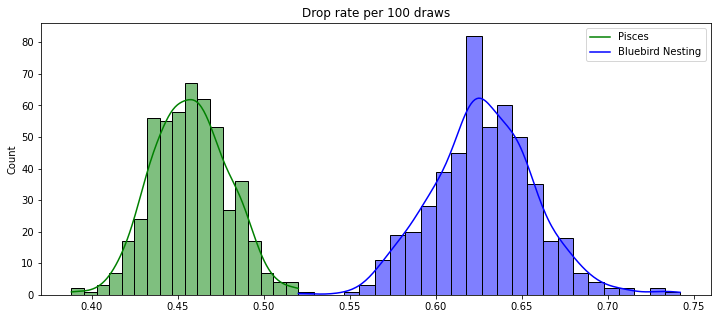

In [15]:
plt.figure(figsize=(12,5))
sns.histplot(pisces_mean,kde=True,color='g')
sns.histplot(bluebird_mean,kde=True,color='b')
plt.title('Drop rate per 100 draws')
plt.legend(labels=["Pisces","Bluebird Nesting"])


I think we all see the results now. The histograms are closer compared to outfit vs hair. Still, there is no overlapping parts. Dragon Raja developers may intend to reallymake one oufit set dominates another set. Let us see the A/B Testing result for statistical view.

In [16]:
# Fashions drop rate
print('Mean Pisces Set Drop Rate: {:.2f}%'.format(np.mean(pisces_mean)))
print('Mean Bluebird Nesting Rate: {:.2f}%'.format(np.mean(bluebird_mean)))     

Mean Pisces Set Drop Rate: 0.46%
Mean Bluebird Nesting Rate: 0.63%


In [17]:
# Test null hypothesis of Bluebird Nesting rate higher than Pisces rate
p_value = np.sum(bluebird_mean > pisces_mean) / len(total_mean)
print('p-value: {}'.format(p_value))

p-value: 1.0


Both approach give the same result once again. We may imply that Bluebird Nesting items have higher chance to draw than Pisces items. If you pull more Pisces fashions more than Bluebird Nesting, your luck is really descent. It's still a bad news that both sets drop rate are not even close to identical.

### Bonus: Drop Rate of Individual Items
After all these questions, you might wonder what is the drop rate for each specific hair or outfit? As a bonus, I will find the answer for each specific items using same approach.

In [20]:
# Define empty arrays
pisces_o_mean , pisces_h_mean = np.empty(500), np.empty(500)
bb_o_mean , bb_h_mean = np.empty(500), np.empty(500)

In [24]:
for i in range(0,500):
    df_temp = df.sample(n=500,replace=True,random_state=i)
    pisces_o_mean[i] = df_temp['pisces_o'].mean()
    pisces_h_mean[i] = df_temp['pisces_h'].mean()
    bb_o_mean[i] = df_temp['bb_o'].mean()
    bb_h_mean[i] = df_temp['bb_h'].mean()

In [27]:
arrays = [pisces_o_mean , pisces_h_mean,bb_o_mean , bb_h_mean]
mean = []
pct_025 = []
pct_975 = []

for i in arrays:
    mean.append(np.mean(i))
    pct_025.append(np.percentile(i,2.5))
    pct_975.append(np.percentile(i,97.5))   
    

In [40]:
# Drop Rate DataFrame
for_df = {'Mean':mean,'Lower 95% CI':pct_025,'Upper 95% CI':pct_975}
index=['Pisces Outfit','Pisces Hair','Bluebird Nesting Outfit','Bluebird Nesting Hair']
pd.DataFrame(for_df,index=index).apply(lambda x: round(x,2))

,Mean,Lower 95% CI,Upper 95% CI
Pisces Outfit,0.11,0.09,0.14
Pisces Hair,0.34,0.30,0.38
Bluebird Nesting Outfit,0.20,0.17,0.24
Bluebird Nesting Hair,0.43,0.38,0.48


## Limitations
This project would have Dragon Raja players to know more infos about Treasure of Time and help them to decide whether it worth to invest their coupons on this lottery. Apart from Treasure of Times, there sill many other events player can invest for fashion items such as King's Treasury or other limited gacha events.

Despite the contribution, the project still has one weakness. The data provided for bootstrapping consist only few entries of experiments. I suggest finding more entries to the data for bigger picture and more accurate results. However, I and my friends do not have access to drawing datas from other players. If you play Dragon Raja or knows friends who buy Treasure of Time, you can send these valuable informations o me to add to sample data. Your contribution will help me a lot in revising and future projects.

As a final remarks, I want to share cuteness of character in Bluebird Nesting set which I do not have enough luck to get one.
RIP

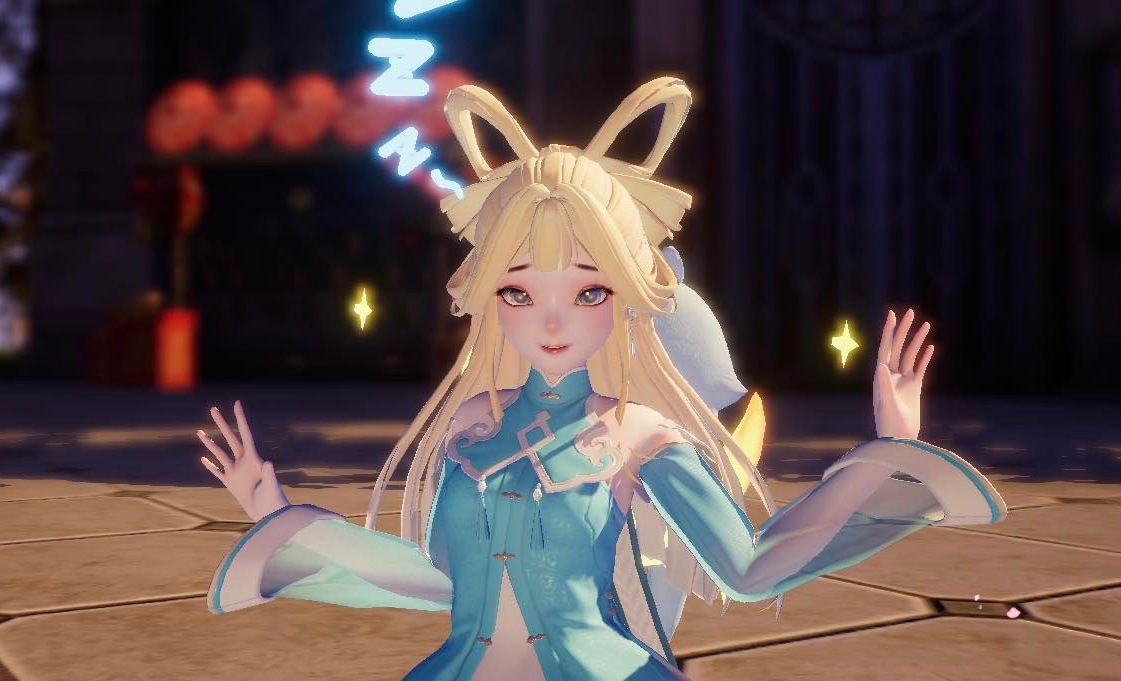